In [1]:
# https://hoonzi-text.tistory.com/19
# https://techblog-history-younghunjo1.tistory.com/114

import pandas as pd
import matplotlib.pyplot as plt
from konlpy.tag import Okt

In [2]:
# 데이터 가져오기
df = pd.read_csv('./final.csv')
print('data size->', len(df))

data size-> 346


In [3]:
df.head()
# df[:5] # 상위 5개 출력

,Unnamed: 0,Document,tokenizedDocument,dm1,dm2,dm3,dm4,dm5,dm6,dm7,...,dm91,dm92,dm93,dm94,dm95,dm96,dm97,dm98,dm99,dm100
0,0,운영체제 서비스 (Operating System Services),운영체제 서비스,0.714455,-0.531385,2.488015,-0.770630,0.112286,0.774671,2.070887,...,-0.610353,-1.074397,-0.708204,-0.606940,-1.245999,1.037042,0.395951,0.475926,0.371759,-1.622231
1,1,운영체제 사용자 인터페이스 (User Operating System Interface),운영체제 사용자 인터페이스,1.373194,-2.268541,2.041227,-1.548548,0.202811,0.251074,0.367272,...,-0.636907,-0.851541,-2.177040,-1.377887,0.282307,1.705836,1.317941,1.302224,-1.182694,-0.189527
2,2,시스템 콜 (System Calls),시스템 콜,0.011394,-0.826875,2.973761,-0.366313,-0.839046,0.789231,0.961213,...,-0.595384,0.178099,1.141711,-1.204290,-0.019782,0.544513,2.611695,1.183234,-0.109376,-0.170399
3,3,시스템 콜 유형 (Types of System Calls),시스템 콜 유형,-0.314897,-1.808564,2.901775,-0.102677,-0.380242,0.683322,0.860649,...,0.153475,0.073037,1.136598,-1.001038,0.101517,0.996975,2.293804,1.101085,-0.827427,0.046568
4,4,시스템 프로그램 (System Programs),시스템 프로그램,0.597797,-4.119634,4.071386,-0.778798,-0.830832,0.947624,2.868076,...,1.820633,-0.196410,-0.282522,-2.117036,1.165344,1.074218,3.273731,1.062482,0.584410,-1.640707


In [4]:
# NULL 값 존재 유무
print(df.isnull().values.any())

False


In [5]:
df = df.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(df.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [6]:
print(len(df)) # 개수 출력

346


In [7]:
okt = Okt() # 형태소 분석기 객체 생성

'''
# Okt의 nouns를 사용한 토큰화
noun_list = []
for content in df['tokenizedDocument']: 
    nouns = okt.nouns(content) # 명사만 추출하기, 결과값은 명사 리스트
    noun_list.append(nouns)
'''

# Okt의 morph를 사용한 토큰화
tokenized_data = []
for sentence in df['tokenizedDocument']:
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    tokenized_data.append(tokenized_sentence)

# 명사 추출 방식의 토큰화에 사용
# df['nouns'] = noun_list
# tokenized_data = df['nouns'].tolist()

# morph 방식의 토큰화에 사용
df['tokenized_data'] = tokenized_data
tokenized_data = df['tokenized_data'].tolist()

최대 길이 : 34
평균 길이 : 5.07514450867052


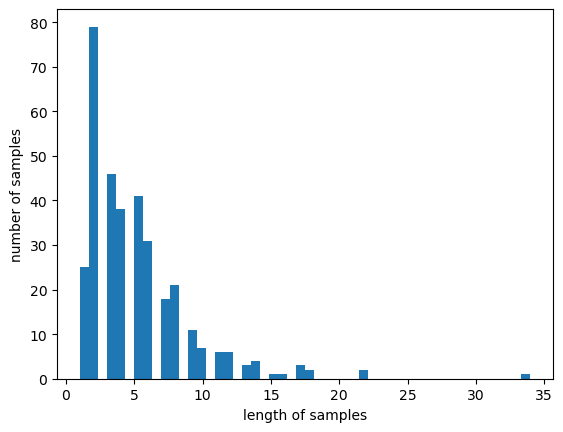

In [8]:
# 길이 분포 확인
print('최대 길이 :',max(len(review) for review in tokenized_data))
print('평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [9]:
tokenized_data[:5] # 상위 5개 출력

[['운영체제', '서비스'],
 ['운영체제', '사용자', '인터페이스'],
 ['시스템', '콜'],
 ['시스템', '콜', '유형'],
 ['시스템', '프로그램']]

In [10]:
df_temp = df.iloc[:346, 3:103] #346

In [11]:
df_temp

,dm1,dm2,dm3,dm4,dm5,dm6,dm7,dm8,dm9,dm10,...,dm91,dm92,dm93,dm94,dm95,dm96,dm97,dm98,dm99,dm100
0,0.714455,-0.531385,2.488015,-0.770630,0.112286,0.774671,2.070887,1.770209,-2.353306,1.783039,...,-0.610353,-1.074397,-0.708204,-0.606940,-1.245999,1.037042,0.395951,0.475926,0.371759,-1.622231
1,1.373194,-2.268541,2.041227,-1.548548,0.202811,0.251074,0.367272,1.672797,-2.467688,1.628929,...,-0.636907,-0.851541,-2.177040,-1.377887,0.282307,1.705836,1.317941,1.302224,-1.182694,-0.189527
2,0.011394,-0.826875,2.973761,-0.366313,-0.839046,0.789231,0.961213,1.684802,-3.608681,0.754566,...,-0.595384,0.178099,1.141711,-1.204290,-0.019782,0.544513,2.611695,1.183234,-0.109376,-0.170399
3,-0.314897,-1.808564,2.901775,-0.102677,-0.380242,0.683322,0.860649,1.900799,-3.395546,0.877328,...,0.153475,0.073037,1.136598,-1.001038,0.101517,0.996975,2.293804,1.101085,-0.827427,0.046568
4,0.597797,-4.119634,4.071386,-0.778798,-0.830832,0.947624,2.868076,3.423932,-5.139442,0.825764,...,1.820633,-0.196410,-0.282522,-2.117036,1.165344,1.074218,3.273731,1.062482,0.584410,-1.640707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,0.222149,-3.372326,3.010398,-1.379068,-1.122083,-1.308177,-0.303563,1.678100,-2.084328,0.348584,...,0.933681,1.303830,-1.493170,-2.017200,0.774388,0.170071,0.344846,2.664122,-0.876150,-2.341106
342,0.212965,-1.827281,3.537088,-1.536552,-0.451717,-1.553486,0.283955,1.621245,-2.918727,0.658755,...,1.060881,-0.256200,-2.471534,-1.501794,-0.710068,0.662465,1.444199,-0.119418,-0.345229,-0.273893
343,0.028034,-1.855329,1.726132,-0.514380,0.055517,-0.897894,-0.397566,1.820389,-1.111108,1.315148,...,1.477395,-0.121360,-0.036039,-0.523707,-0.609615,0.579980,0.493013,0.585409,-0.329471,-0.318402
344,0.375210,-1.566365,1.840266,0.172384,-0.653272,0.393887,0.515321,1.490309,-2.052484,1.067986,...,2.143717,-0.657411,-1.112525,0.238495,0.045189,0.705270,1.014119,-0.178653,0.173723,-0.018322


## DBSCAN

sklearn.cluster.DBSCAN 이용. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

주요 파라미터:
- `eps`: 서로 이웃으로 간주되는 두 샘플 사이의 최대 거리. 기본값=0.5.
- `min_samples`: 어떤 샘플이 핵심 샘플로 간주되기 위해 자신의 이웃에 존재해야 하는 샘플의 개수(자신도 포함). 기본값=5.

주요 속성:
- `labels_`: 각 샘플의 클러스터 레이블(핵심 샘플의 인덱스). 이상치 샘플의 레이블은 -1.
- `core_sample_indices_`: 핵심 샘플의 인덱스. (핵심 샘플 개수,) 모양의 다차원 배열.
- `components_`: 핵심 샘플. (핵심 샘플 개수, 특성 개수) 모양의 다차원 배열.

In [12]:
# DBSCAN을 활용한 군집화
from sklearn.cluster import DBSCAN

# 자신을 포함하여 특정 거리(eps) 내에 특정 개수(min_samples) 이상의 샘플이 존재하는 샘플을 핵심 샘플로 간주.
# 핵심 샘플로부터 특정 거리 이내에 있는 모든 샘플은 동일한 클러스터에 소속됨
# 이 이웃에는 다른 핵심 샘플이 포함될 수도 있고, 핵심 샘플들의 연속된 이웃이 하나의 클러스터를 형성할 수도 있음.
model = DBSCAN(eps=0.0001,min_samples=5, metric = "cosine")
# metric: 샘플 간의 거리 계산 식으로는 Cosine distance를 이용
result = model.fit_predict(df_temp) # DBSCAN의 .fit_predict() 함수를 사용
# DBSCAN 클러스터링만 수행하는 .fit() 메서드와 달리 클러스터를 계산하고 레이블을 예측한다.

In [13]:
result

array([ 0,  1, -1,  2,  3, -1,  4, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,
        0, -1,  1, -1, -1,  0, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,
       -1, -1,  0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,
       -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  3, -1, -1, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1,  3, -1, -1,
       -1, -1, -1, -1, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  3,
       -1, -1, -1, -1, -1

In [14]:
# 각 샘플의 레이블: 핵심 샘플들의 인덱스 또는 이상치 인덱스(-1)
result[:10]

array([ 0,  1, -1,  2,  3, -1,  4, -1, -1, -1], dtype=int64)

In [15]:
# 핵심 샘플들
model.components_[:5]

array([[ 7.14455300e-01, -5.31384500e-01,  2.48801500e+00,
        -7.70629800e-01,  1.12286470e-01,  7.74671300e-01,
         2.07088730e+00,  1.77020900e+00, -2.35330630e+00,
         1.78303860e+00, -1.52544600e+00, -1.17658100e+00,
        -1.10703720e+00,  4.42605560e-01,  1.71463040e+00,
        -1.99590410e-01, -1.91826080e+00, -1.49604290e-01,
        -4.99330220e-01, -1.98056380e+00,  1.33747630e+00,
        -6.05109500e-01, -2.26519160e+00, -5.14760500e-01,
        -2.93334580e+00,  2.35693470e-01, -4.06357300e-02,
         6.94103500e-01,  2.70678500e+00,  6.06962740e-01,
         2.64876650e+00, -1.09482290e+00, -1.07393630e+00,
         7.98740900e-01, -4.60650350e-01,  2.85037280e-01,
         8.45990240e-01,  1.63535640e-01, -4.61852940e-01,
         2.01855750e+00, -1.15322700e-01,  2.61840270e+00,
        -1.07241150e+00,  1.09742520e+00,  5.76488400e-01,
         2.62438450e-01,  5.07581900e-01,  6.65257900e-01,
        -7.35826200e-01, -6.54467340e-01,  8.23961700e-0

In [16]:
# 핵심 샘플들의 인덱스
model.core_sample_indices_[:10]

array([ 0,  1,  3,  4,  6, 14, 17, 19, 22, 28], dtype=int64)

In [17]:
df['result'] = result

In [18]:
df.head()

,Unnamed: 0,Document,tokenizedDocument,dm1,dm2,dm3,dm4,dm5,dm6,dm7,...,dm93,dm94,dm95,dm96,dm97,dm98,dm99,dm100,tokenized_data,result
0,0,운영체제 서비스 (Operating System Services),운영체제 서비스,0.714455,-0.531385,2.488015,-0.770630,0.112286,0.774671,2.070887,...,-0.708204,-0.606940,-1.245999,1.037042,0.395951,0.475926,0.371759,-1.622231,"[운영체제, 서비스]",0
1,1,운영체제 사용자 인터페이스 (User Operating System Interface),운영체제 사용자 인터페이스,1.373194,-2.268541,2.041227,-1.548548,0.202811,0.251074,0.367272,...,-2.177040,-1.377887,0.282307,1.705836,1.317941,1.302224,-1.182694,-0.189527,"[운영체제, 사용자, 인터페이스]",1
2,2,시스템 콜 (System Calls),시스템 콜,0.011394,-0.826875,2.973761,-0.366313,-0.839046,0.789231,0.961213,...,1.141711,-1.204290,-0.019782,0.544513,2.611695,1.183234,-0.109376,-0.170399,"[시스템, 콜]",-1
3,3,시스템 콜 유형 (Types of System Calls),시스템 콜 유형,-0.314897,-1.808564,2.901775,-0.102677,-0.380242,0.683322,0.860649,...,1.136598,-1.001038,0.101517,0.996975,2.293804,1.101085,-0.827427,0.046568,"[시스템, 콜, 유형]",2
4,4,시스템 프로그램 (System Programs),시스템 프로그램,0.597797,-4.119634,4.071386,-0.778798,-0.830832,0.947624,2.868076,...,-0.282522,-2.117036,1.165344,1.074218,3.273731,1.062482,0.584410,-1.640707,"[시스템, 프로그램]",3


In [19]:
for cluster_num in set(result):
    # -1,0은 노이즈 판별이 났거나 클러스터링이 안된 경우
    if(cluster_num == -1 or cluster_num == 0): 
        continue
    else:
        print("cluster num : {}".format(cluster_num))
        temp_df = df[df['result'] == cluster_num] # cluster num 별로 조회
        for title in temp_df['Document']:
            print(title) # 토큰별로 나타내도록 한다.
        print()

cluster num : 1
 운영체제 사용자 인터페이스 (User Operating System Interface)
사용자 인터페이스
사용자 인터페이스 – CLI
사용자 인터페이스 – CLI
사용자 인터페이스 – GUI

cluster num : 2
 시스템 콜 유형 (Types of System Calls)
시스템 콜 유형  
시스템 콜 유형  
시스템 콜 유형  
시스템 콜 유형  

cluster num : 3
 시스템 프로그램 (System Programs)
시스템 프로그램 (System Programs)  
시스템 프로그램 (System Programs)  
시스템 프로그램 (System Programs)  
시스템 프로그램 (System Programs)  
시스템 프로그램 (System Programs)  
 시스템 프로그램

cluster num : 4
 운영체제 구조 (Operating System Structure)
운영체제 구조 (structure)
간단한 구조 -- MS-DOS
좀더 복잡한 구조 - UNIX
Android Architecture (구조)

